In [45]:
from cmdstanpy import CmdStanModel
import arviz as az
import numpy as np

In [6]:
#F - number of letters in first name L - number of letters in last name N = (L+F)*100
F = 5
L = 6
N = (L+F)*100

In [7]:
data=dict(N=N)

In [8]:
data_generator_code1 = CmdStanModel(stan_file = 'code_1.stan')

INFO:cmdstanpy:found newer exe file, not recompiling


In [15]:
result_code1 = data_generator_code1.sample(data=data)

INFO:cmdstanpy:CmdStan start processing
chain 1 |          | 00:00 Status
chain 2 |          | 00:00 Status

chain 3 |          | 00:00 Status


chain 4 |          | 00:00 Status

chain 3 |▍         | 00:00 Status


chain 4 |▉         | 00:00 Iteration:   1 / 1000 [  0%]  (Sampling)
chain 1 |▉         | 00:00 Iteration:   1 / 1000 [  0%]  (Sampling)

chain 3 |▉         | 00:00 Iteration:   1 / 1000 [  0%]  (Sampling)
chain 2 |█▎        | 00:00 Iteration: 100 / 1000 [ 10%]  (Sampling)


chain 1 |█▎        | 00:00 Iteration: 100 / 1000 [ 10%]  (Sampling)
chain 2 |█▊        | 00:00 Iteration: 200 / 1000 [ 20%]  (Sampling)

chain 3 |█▎        | 00:00 Iteration: 100 / 1000 [ 10%]  (Sampling)


chain 4 |██▎       | 00:00 Iteration: 300 / 1000 [ 30%]  (Sampling)
chain 1 |█▊        | 00:00 Iteration: 200 / 1000 [ 20%]  (Sampling)
chain 2 |██▋       | 00:00 Iteration: 400 / 1000 [ 40%]  (Sampling)

chain 3 |█▊        | 00:00 Iteration: 200 / 1000 [ 20%]  (Sampling)


chain 4 |██▋       | 00:00 


INFO:cmdstanpy:CmdStan done processing.


In [16]:
data_generator_code2 = CmdStanModel(stan_file = 'code_2.stan')

INFO:cmdstanpy:found newer exe file, not recompiling


In [17]:
result_code2 = data_generator_code2.sample(data=data)

INFO:cmdstanpy:CmdStan start processing
chain 1 |          | 00:00 Status
chain 2 |          | 00:00 Status

chain 3 |          | 00:00 Status


chain 1 |▉         | 00:00 Iteration:   1 / 1000 [  0%]  (Sampling)

chain 3 |▉         | 00:00 Iteration:   1 / 1000 [  0%]  (Sampling)
chain 2 |▉         | 00:00 Iteration:   1 / 1000 [  0%]  (Sampling)


chain 1 |█▎        | 00:01 Iteration: 100 / 1000 [ 10%]  (Sampling)

chain 3 |█▎        | 00:01 Iteration: 100 / 1000 [ 10%]  (Sampling)

chain 1 |█▊        | 00:01 Iteration: 200 / 1000 [ 20%]  (Sampling)
chain 2 |█▎        | 00:01 Iteration: 100 / 1000 [ 10%]  (Sampling)


chain 1 |██▎       | 00:02 Iteration: 300 / 1000 [ 30%]  (Sampling)

chain 3 |██▎       | 00:02 Iteration: 300 / 1000 [ 30%]  (Sampling)
chain 2 |█▊        | 00:02 Iteration: 200 / 1000 [ 20%]  (Sampling)


chain 4 |█▊        | 00:02 Iteration: 200 / 1000 [ 20%]  (Sampling)

chain 1 |██▋       | 00:03 Iteration: 400 / 1000 [ 40%]  (Sampling)

chain 3 |███▏      | 00:03 


INFO:cmdstanpy:CmdStan done processing.


In [77]:
X_matrix = result_code2.stan_variable('X')[0]
print(len(X_matrix))

1100


In [20]:
x_code1=result_code1.draws_pd()
print(x_code1)

      lp__  accept_stat__  theta       y[1]      y[2]      y[3]      y[4]  \
0      0.0            0.0   0.01  -1.782750  1.979680  0.561230  0.495072   
1      0.0            0.0   0.01 -10.056100 -1.769530 -2.160840 -0.510765   
2      0.0            0.0   0.01   1.899310 -2.042250 -1.015540 -1.401440   
3      0.0            0.0   0.01  -2.570830 -0.499384  0.958350 -1.024800   
4      0.0            0.0   0.01   0.835030 -0.350989  0.597255  1.145320   
...    ...            ...    ...        ...       ...       ...       ...   
3995   0.0            0.0   0.01  -0.374658 -2.328870 -0.487261 -1.988530   
3996   0.0            0.0   0.01   0.744234 -0.076082  0.826341  0.798837   
3997   0.0            0.0   0.01   0.771509 -0.775138 -0.725111  0.344680   
3998   0.0            0.0   0.01  -1.903100 -0.706071  0.214512 -0.676375   
3999   0.0            0.0   0.01   0.094132 -1.593480 -0.778401  1.601870   

          y[5]      y[6]      y[7]  ...   y[1091]   y[1092]   y[1093]  \
0 

In [25]:
y_code1=x_code1.iloc[:,3:]
y_mean_code1=y_code1.mean()
print(y_mean_code1)

y[1]       0.120486
y[2]       0.100612
y[3]       0.115663
y[4]       0.097870
y[5]       0.075085
             ...   
y[1096]    0.113345
y[1097]    0.100436
y[1098]    0.099557
y[1099]    0.054621
y[1100]    0.124008
Length: 1100, dtype: float64


In [31]:
x_code2=result_code2.draws_pd()
print(x_code2[:,:3])

      lp__  accept_stat__    X[1,1]    X[2,1]    X[3,1]    X[4,1]    X[5,1]  \
0      0.0            0.0 -1.850280 -0.318081 -1.246870 -0.294496 -0.495250   
1      0.0            0.0 -0.989212 -0.714618  0.507873 -0.129637  1.623660   
2      0.0            0.0  0.972074 -2.083110 -1.475280  0.135226  0.834730   
3      0.0            0.0  0.065313 -0.527437  2.011630  0.339374 -1.227790   
4      0.0            0.0 -0.327398  0.226516  0.755429 -0.023097  0.448057   
...    ...            ...       ...       ...       ...       ...       ...   
3995   0.0            0.0 -1.041460  1.950730  0.343806 -0.611856  0.334699   
3996   0.0            0.0  0.468388 -1.859850  0.674529  0.233805  1.162450   
3997   0.0            0.0 -1.058720  0.779476  0.206549  0.225360  0.146348   
3998   0.0            0.0  2.083460 -1.081720 -0.329557 -1.528970 -1.019960   
3999   0.0            0.0 -0.636073 -2.216110 -0.386981  0.496602 -0.346372   

        X[6,1]    X[7,1]    X[8,1]  ...   y[1091]  

In [35]:
y_code2=x_code2.iloc[:,-1100:]
print(x_code2.iloc[:,-1100:])

          y[1]      y[2]      y[3]      y[4]      y[5]      y[6]      y[7]  \
0    -5.447360 -0.381318 -2.853540 -3.127850 -3.023500 -0.311763  1.548020   
1    -2.899980 -0.711527  3.396700  0.487139  3.992880  1.754030  0.024005   
2     4.949630 -2.965710 -5.097120  1.406930 -2.767630  1.358230 -0.684265   
3     2.234150 -1.389110  3.868190  1.511130 -2.614970 -0.345437 -0.958365   
4    -3.329690  3.250530  1.781160  0.213454  0.993367 -1.156350  0.385571   
...        ...       ...       ...       ...       ...       ...       ...   
3995 -2.338660  3.318010  2.532930  0.454822  0.534679  1.252190 -1.308770   
3996  0.058132 -5.950720  0.696447  1.014020  3.801720  1.983990 -1.638920   
3997 -1.639010  3.142860  0.899919  1.135060 -1.537630 -0.638299  1.707090   
3998  2.770570 -2.976400 -3.373030 -5.283970 -0.253920  6.113130  1.103330   
3999  0.007063 -3.537730 -0.110572  0.883746 -0.430481 -1.212840  0.636016   

          y[8]      y[9]     y[10]  ...   y[1091]   y[1092]   y

In [36]:
y_mean_code2=y_code2.mean(axis=0)

In [37]:
print(y_mean_code2)

y[1]      -0.038368
y[2]      -0.010072
y[3]       0.030604
y[4]       0.011647
y[5]      -0.017388
             ...   
y[1096]    0.006318
y[1097]    0.062285
y[1098]    0.049706
y[1099]    0.020721
y[1100]    0.000182
Length: 1100, dtype: float64


Excercise 2 - compare normal and student models for data from first file

In [42]:
model_code3 = CmdStanModel(stan_file='code_3.stan')
data_model3_v1 = dict(N=N,
                 y=y_mean_code1)
result_model3_v1 = model_code3.sample(data=data_model3_v1)

data_model3_v2 = dict(N=N,
                 y=y_mean_code2)
result_model3_v2 = model_code3.sample(data=data_model3_v2)

INFO:cmdstanpy:found newer exe file, not recompiling
INFO:cmdstanpy:CmdStan start processing
chain 1 |          | 00:00 Status
chain 2 |          | 00:00 Status

chain 3 |          | 00:00 Status


chain 1 |█▎        | 00:00 Iteration:  100 / 2000 [  5%]  (Warmup)
chain 2 |█▊        | 00:00 Iteration:  200 / 2000 [ 10%]  (Warmup)


chain 4 |████▌     | 00:00 Iteration:  800 / 2000 [ 40%]  (Warmup)

chain 3 |█▎        | 00:00 Iteration:  100 / 2000 [  5%]  (Warmup)

chain 1 |████      | 00:00 Iteration:  700 / 2000 [ 35%]  (Warmup)
chain 2 |████▌     | 00:00 Iteration:  800 / 2000 [ 40%]  (Warmup)

chain 3 |█████▉    | 00:00 Iteration: 1001 / 2000 [ 50%]  (Sampling)
chain 1 |██████▎   | 00:01 Iteration: 1100 / 2000 [ 55%]  (Sampling)
chain 2 |████████▏ | 00:01 Iteration: 1500 / 2000 [ 75%]  (Sampling)

chain 1 |███████▋  | 00:01 Iteration: 1400 / 2000 [ 70%]  (Sampling)
chain 2 |█████████ | 00:02 Iteration: 1700 / 2000 [ 85%]  (Sampling)

chain 3 |████████▏ | 00:02 Iteration: 1500 / 200


INFO:cmdstanpy:CmdStan done processing.


INFO:cmdstanpy:CmdStan start processing
chain 1 |          | 00:00 Status
chain 2 |          | 00:00 Status

chain 3 |          | 00:00 Status


chain 1 |████▌     | 00:00 Iteration:  800 / 2000 [ 40%]  (Warmup)
chain 2 |█▊        | 00:00 Iteration:  200 / 2000 [ 10%]  (Warmup)


chain 4 |█▎        | 00:00 Iteration:  100 / 2000 [  5%]  (Warmup)

chain 3 |█▊        | 00:00 Iteration:  200 / 2000 [ 10%]  (Warmup)


chain 4 |█████     | 00:00 Iteration:  900 / 2000 [ 45%]  (Warmup)
chain 2 |█████▉    | 00:00 Iteration: 1001 / 2000 [ 50%]  (Sampling)

chain 3 |█████▉    | 00:00 Iteration: 1001 / 2000 [ 50%]  (Sampling)


chain 4 |███████▋  | 00:01 Iteration: 1400 / 2000 [ 70%]  (Sampling)

chain 3 |███████▎  | 00:01 Iteration: 1300 / 2000 [ 65%]  (Sampling)
chain 2 |███████▎  | 00:01 Iteration: 1300 / 2000 [ 65%]  (Sampling)

chain 3 |████████▏ | 00:01 Iteration: 1500 / 2000 [ 75%]  (Sampling)
chain 1 |█████████ | 00:02 Iteration: 1700 / 2000 [ 85%]  (Sampling)

chain 3 |█████████ | 00:02


INFO:cmdstanpy:CmdStan done processing.


In [43]:
model_code4 = CmdStanModel(stan_file='code_4.stan')
data_model4_v1 = dict(N=N,
                 y=y_mean_code1)
result_model4_v1 = model_code4.sample(data=data_model4_v1)

data_model4_v2 = dict(N=N,
                 y=y_mean_code2)
result_model4_v2 = model_code4.sample(data=data_model4_v2)

INFO:cmdstanpy:found newer exe file, not recompiling
INFO:cmdstanpy:CmdStan start processing
chain 1 |          | 00:00 Status
chain 2 |          | 00:00 Status

chain 3 |          | 00:00 Status


chain 4 |          | 00:00 Status
chain 1 |▉         | 00:00 Iteration:    1 / 2000 [  0%]  (Warmup)

chain 1 |█▊        | 00:00 Iteration:  200 / 2000 [ 10%]  (Warmup)

chain 1 |██▋       | 00:00 Iteration:  400 / 2000 [ 20%]  (Warmup)

chain 3 |██▎       | 00:00 Iteration:  300 / 2000 [ 15%]  (Warmup)

chain 1 |███▋      | 00:00 Iteration:  600 / 2000 [ 30%]  (Warmup)

chain 1 |█████     | 00:00 Iteration:  900 / 2000 [ 45%]  (Warmup)

chain 3 |█████     | 00:00 Iteration:  900 / 2000 [ 45%]  (Warmup)


chain 4 |▉         | 00:00 Iteration:    1 / 2000 [  0%]  (Warmup)

chain 3 |█████▉    | 00:01 Iteration: 1001 / 2000 [ 50%]  (Sampling)
chain 1 |█████▉    | 00:01 Iteration: 1001 / 2000 [ 50%]  (Sampling)A


chain 4 |█▎        | 00:01 Iteration:  100 / 2000 [  5%]  (Warmup)


chain 4 |██▎ 


INFO:cmdstanpy:CmdStan done processing.


INFO:cmdstanpy:CmdStan start processing
chain 1 |          | 00:00 Status
chain 2 |          | 00:00 Status

chain 3 |          | 00:00 Status


chain 4 |          | 00:00 Status
chain 2 |█▎        | 00:00 Iteration:  100 / 2000 [  5%]  (Warmup)

chain 3 |▉         | 00:00 Iteration:    1 / 2000 [  0%]  (Warmup)
chain 2 |██▋       | 00:00 Iteration:  400 / 2000 [ 20%]  (Warmup)


chain 4 |▉         | 00:00 Iteration:    1 / 2000 [  0%]  (Warmup)

chain 3 |█▎        | 00:00 Iteration:  100 / 2000 [  5%]  (Warmup)
chain 2 |████      | 00:00 Iteration:  700 / 2000 [ 35%]  (Warmup)


chain 4 |█▎        | 00:00 Iteration:  100 / 2000 [  5%]  (Warmup)

chain 3 |█▊        | 00:00 Iteration:  200 / 2000 [ 10%]  (Warmup)
chain 2 |█████▍    | 00:00 Iteration: 1000 / 2000 [ 50%]  (Warmup)


chain 4 |██▎       | 00:00 Iteration:  300 / 2000 [ 15%]  (Warmup)

chain 3 |██▋       | 00:00 Iteration:  400 / 2000 [ 20%]  (Warmup)

chain 3 |████      | 00:00 Iteration:  700 / 2000 [ 35%]  (Warmup)


chai


INFO:cmdstanpy:CmdStan done processing.


Compare model3

In [46]:
az.loo(result_model3_v1)

Computed from 4000 by 1100 log-likelihood matrix

         Estimate       SE
elpd_loo  2447.75    24.23
p_loo        1.97        -

In [48]:
az.loo(result_model3_v2)

Computed from 4000 by 1100 log-likelihood matrix

         Estimate       SE
elpd_loo  1999.98    22.29
p_loo        1.96        -

In [49]:
az.waic(result_model3_v1)

Computed from 4000 by 1100 log-likelihood matrix

          Estimate       SE
elpd_waic  2447.75    24.23
p_waic        1.97        -

In [50]:
az.waic(result_model3_v2)

Computed from 4000 by 1100 log-likelihood matrix

          Estimate       SE
elpd_waic  1999.98    22.29
p_waic        1.96        -

Compare model4

In [51]:
az.loo(result_model4_v1)

Computed from 4000 by 1100 log-likelihood matrix

         Estimate       SE
elpd_loo  2447.55    24.30
p_loo        2.21        -

In [52]:
az.loo(result_model4_v2)

Computed from 4000 by 1100 log-likelihood matrix

         Estimate       SE
elpd_loo  1998.11    22.48
p_loo        1.95        -

In [53]:
az.waic(result_model4_v1)

Computed from 4000 by 1100 log-likelihood matrix

          Estimate       SE
elpd_waic  2447.55    24.30
p_waic        2.21        -

In [54]:
az.waic(result_model4_v2)

Computed from 4000 by 1100 log-likelihood matrix

          Estimate       SE
elpd_waic  1998.11    22.48
p_waic        1.95        -

Compare

In [55]:
res_model3_v1=az.from_cmdstanpy(result_model3_v1)
res_model3_v2=az.from_cmdstanpy(result_model3_v2)

In [56]:
compare_model3=az.compare({"1":res_model3_v1,"2":res_model3_v2})
print(compare_model3)

/home/agata/PycharmProjects/test1/venv/lib/python3.9/site-packages/arviz/stats/stats.py:248: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  ics = ics.append([ic_func(dataset, pointwise=True, scale=scale, var_name=var_name)])


   rank          loo     p_loo       d_loo    weight         se        dse  \
1     0  2447.748473  1.965231    0.000000  0.944839  24.230126   0.000000   
2     1  1999.984260  1.955569  447.764213  0.055161  22.292209  32.354415   

   warning loo_scale  
1    False       log  
2    False       log  


/home/agata/PycharmProjects/test1/venv/lib/python3.9/site-packages/arviz/stats/stats.py:248: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  ics = ics.append([ic_func(dataset, pointwise=True, scale=scale, var_name=var_name)])


<AxesSubplot:xlabel='Log'>

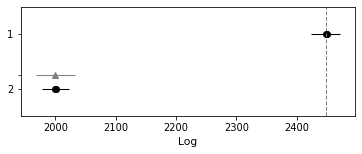

In [59]:
az.plot_compare(compare_model3)

In [57]:
res_model4_v1=az.from_cmdstanpy(result_model4_v1)
res_model4_v2=az.from_cmdstanpy(result_model4_v2)

In [58]:
compare_model4=az.compare({"1":res_model4_v1,"2":res_model4_v2})
print(compare_model4)

/home/agata/PycharmProjects/test1/venv/lib/python3.9/site-packages/arviz/stats/stats.py:248: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  ics = ics.append([ic_func(dataset, pointwise=True, scale=scale, var_name=var_name)])


   rank          loo     p_loo       d_loo    weight         se        dse  \
1     0  2447.547640  2.208321    0.000000  0.940413  24.304691   0.000000   
2     1  1998.109119  1.950256  449.438521  0.059587  22.478715  32.575757   

   warning loo_scale  
1    False       log  
2    False       log  


/home/agata/PycharmProjects/test1/venv/lib/python3.9/site-packages/arviz/stats/stats.py:248: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  ics = ics.append([ic_func(dataset, pointwise=True, scale=scale, var_name=var_name)])


<AxesSubplot:xlabel='Log'>

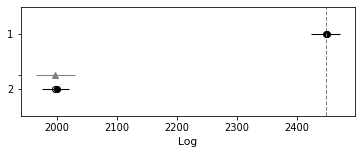

In [60]:
az.plot_compare(compare_model4)

Excercise 3 - compare models with different numbers of predictors

In [61]:
model5=CmdStanModel(stan_file='code_5.stan')

INFO:cmdstanpy:compiling stan file /home/agata/PycharmProjects/test1/lab7/code_5.stan to exe file /home/agata/PycharmProjects/test1/lab7/code_5
INFO:cmdstanpy:compiled model executable: /home/agata/PycharmProjects/test1/lab7/code_5


Predictor K=1

In [92]:
nxm=[]
for i in X_matrix[:,0]:
    nxm.append([i])

data5_K1=dict(N=N,K=1,y=np.array(y_mean_code2),X=nxm)
result_K1= model5.sample(data=data5_K1)

INFO:cmdstanpy:CmdStan start processing
chain 1 |          | 00:00 Status
chain 2 |          | 00:00 Status

chain 3 |          | 00:00 Status


chain 4 |          | 00:00 Status
chain 1 |█▎        | 00:00 Iteration:  100 / 2000 [  5%]  (Warmup)


chain 4 |█▎        | 00:00 Iteration:  100 / 2000 [  5%]  (Warmup)

chain 1 |██▋       | 00:00 Iteration:  400 / 2000 [ 20%]  (Warmup)


chain 4 |███▏      | 00:00 Iteration:  500 / 2000 [ 25%]  (Warmup)
chain 1 |████      | 00:00 Iteration:  700 / 2000 [ 35%]  (Warmup)

chain 3 |██▎       | 00:00 Iteration:  300 / 2000 [ 15%]  (Warmup)
chain 2 |██▋       | 00:00 Iteration:  400 / 2000 [ 20%]  (Warmup)

chain 3 |███▋      | 00:00 Iteration:  600 / 2000 [ 30%]  (Warmup)
chain 2 |████      | 00:00 Iteration:  700 / 2000 [ 35%]  (Warmup)


chain 1 |█████▉    | 00:00 Iteration: 1001 / 2000 [ 50%]  (Sampling)

chain 3 |█████▉    | 00:00 Iteration: 1001 / 2000 [ 50%]  (Sampling)
chain 2 |█████▉    | 00:01 Iteration: 1001 / 2000 [ 50%]  (Sampling)




INFO:cmdstanpy:CmdStan done processing.


Predictor K=2

In [89]:
nxm=[]
matrix_tmp = X_matrix[:,0:2]
for i in matrix_tmp:
    vect = []
    for j in i:
        vect.append(j)
    nxm.append(vect)

data5_K2=dict(N=N,K=2,y=np.array(y_mean_code2),X=nxm)
result_K2= model5.sample(data=data5_K2)

INFO:cmdstanpy:CmdStan start processing
chain 1 |          | 00:00 Status
chain 2 |          | 00:00 Status

chain 3 |          | 00:00 Status


chain 4 |          | 00:00 Status

chain 3 |▉         | 00:00 Iteration:    1 / 2000 [  0%]  (Warmup)
chain 1 |▉         | 00:00 Iteration:    1 / 2000 [  0%]  (Warmup)


chain 4 |▉         | 00:00 Iteration:    1 / 2000 [  0%]  (Warmup)

chain 1 |█▊        | 00:00 Iteration:  200 / 2000 [ 10%]  (Warmup)
chain 2 |██▋       | 00:00 Iteration:  400 / 2000 [ 20%]  (Warmup)

chain 3 |███▋      | 00:00 Iteration:  600 / 2000 [ 30%]  (Warmup)


chain 4 |█▊        | 00:00 Iteration:  200 / 2000 [ 10%]  (Warmup)
chain 1 |███▏      | 00:00 Iteration:  500 / 2000 [ 25%]  (Warmup)

chain 3 |█████     | 00:00 Iteration:  900 / 2000 [ 45%]  (Warmup)


chain 1 |████      | 00:00 Iteration:  700 / 2000 [ 35%]  (Warmup)


chain 4 |████▌     | 00:00 Iteration:  800 / 2000 [ 40%]  (Warmup)
chain 1 |█████▉    | 00:00 Iteration: 1001 / 2000 [ 50%]  (Sampling)


c


INFO:cmdstanpy:CmdStan done processing.


Predictor K = 3

In [88]:
nxm=[]
matrix_tmp = X_matrix[:,0:3]
for i in matrix_tmp:
    vect = []
    for j in i:
        vect.append(j)
    nxm.append(vect)

print(len(matrix_tmp[0]))

data5_K3=dict(N=N,K=3,y=np.array(y_mean_code2),X=nxm)
result_K3= model5.sample(data=data5_K3)

INFO:cmdstanpy:CmdStan start processing


3


chain 1 |          | 00:00 Status
chain 2 |          | 00:00 Status

chain 3 |          | 00:00 Status


chain 4 |          | 00:00 Status
chain 2 |█▎        | 00:00 Iteration:  100 / 2000 [  5%]  (Warmup)


chain 4 |▉         | 00:00 Iteration:    1 / 2000 [  0%]  (Warmup)

chain 1 |█▎        | 00:00 Iteration:  100 / 2000 [  5%]  (Warmup)


chain 1 |██▋       | 00:00 Iteration:  400 / 2000 [ 20%]  (Warmup)

chain 3 |█▎        | 00:00 Iteration:  100 / 2000 [  5%]  (Warmup)


chain 4 |████      | 00:00 Iteration:  700 / 2000 [ 35%]  (Warmup)
chain 1 |████▌     | 00:00 Iteration:  800 / 2000 [ 40%]  (Warmup)

chain 3 |█▊        | 00:00 Iteration:  200 / 2000 [ 10%]  (Warmup)
chain 2 |███▋      | 00:00 Iteration:  600 / 2000 [ 30%]  (Warmup)

chain 3 |███▏      | 00:00 Iteration:  500 / 2000 [ 25%]  (Warmup)
chain 2 |█████     | 00:00 Iteration:  900 / 2000 [ 45%]  (Warmup)

chain 3 |████▌     | 00:00 Iteration:  800 / 2000 [ 40%]  (Warmup)


chain 1 |█████▉    | 00:00 Iteration: 1001 /


INFO:cmdstanpy:CmdStan done processing.


In [95]:
az.loo(result_K1)

Computed from 4000 by 1100 log-likelihood matrix

         Estimate       SE
elpd_loo  2000.03    22.18
p_loo        1.86        -

In [90]:
az.loo(result_K2)

Computed from 4000 by 1100 log-likelihood matrix

         Estimate       SE
elpd_loo  1999.09    22.12
p_loo        2.87        -

In [96]:
az.loo(result_K3)

Computed from 4000 by 1100 log-likelihood matrix

         Estimate       SE
elpd_loo  2000.76    22.37
p_loo        3.89        -

In [97]:
az.waic(result_K1)

Computed from 4000 by 1100 log-likelihood matrix

          Estimate       SE
elpd_waic  2000.03    22.18
p_waic        1.86        -

In [98]:
az.waic(result_K2)

Computed from 4000 by 1100 log-likelihood matrix

          Estimate       SE
elpd_waic  1999.09    22.12
p_waic        2.87        -

In [99]:
az.waic(result_K3)

Computed from 4000 by 1100 log-likelihood matrix

          Estimate       SE
elpd_waic  2000.76    22.37
p_waic        3.89        -

In [101]:
compare_model5_K1=az.from_cmdstanpy(result_K1)
compare_model5_K2=az.from_cmdstanpy(result_K2)
compare_model5_K3=az.from_cmdstanpy(result_K3)

compare_result_model5=az.compare({"1":compare_model5_K1,"2":compare_model5_K2, "3":compare_model5_K3})
compare_result_model5

/home/agata/PycharmProjects/test1/venv/lib/python3.9/site-packages/arviz/stats/stats.py:248: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  ics = ics.append([ic_func(dataset, pointwise=True, scale=scale, var_name=var_name)])
/home/agata/PycharmProjects/test1/venv/lib/python3.9/site-packages/arviz/stats/stats.py:248: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  ics = ics.append([ic_func(dataset, pointwise=True, scale=scale, var_name=var_name)])
/home/agata/PycharmProjects/test1/venv/lib/python3.9/site-packages/arviz/stats/stats.py:248: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  ics = ics.append([ic_func(dataset, pointwise=True, scale=scale, var_name=var_name)])


,rank,loo,p_loo,d_loo,weight,se,dse,warning,loo_scale
3,0,2000.760892,3.886271,0.000000,0.631033,22.365381,0.000000,False,log
1,1,2000.030671,1.863674,0.730221,0.368967,22.178642,2.365531,False,log
2,2,1999.087564,2.872391,1.673328,0.000000,22.117456,2.338191,False,log


<AxesSubplot:xlabel='Log'>

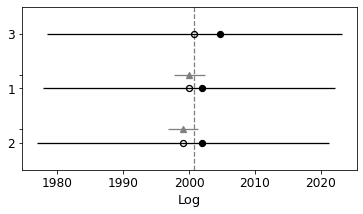

In [102]:
az.plot_compare(compare_result_model5)